<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

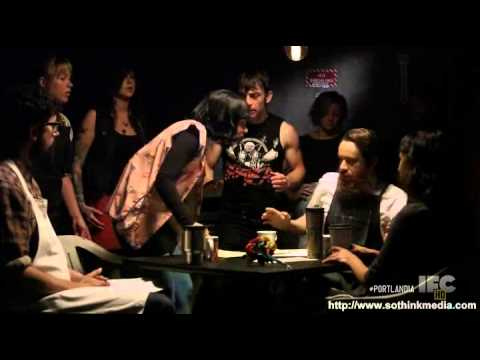

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/oscarcalzada/Documents/Lambda_School/Unit4/Week1/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [60]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import os
import re

In [62]:
# Start here
shops['rating'] = shops['star_rating'].apply(lambda x: x.replace(' star rating', '')).astype('float')
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
del shops['star_rating']
shops.head()

,coffee_shop_name,full_review_text,rating,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,12/3/2016


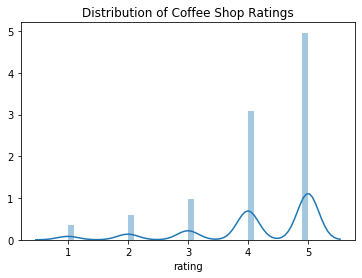

In [71]:
sns.distplot(shops['rating']).set_title('Distribution of Coffee Shop Ratings');

In [64]:
!pip install spacy squarify

In [67]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [68]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [72]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops['lemmas'].head()

0    [1, check, love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating, over...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [73]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [75]:
wc = count(shops['lemmas'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
21,coffee,4848,10153,1.0,0.028068,0.028068,0.636555
126,place,3879,6026,2.0,0.016659,0.044728,0.509322
170,good,3590,5393,3.0,0.014909,0.059637,0.471376
104,great,2843,3924,4.0,0.010848,0.070485,0.373293
31,check,3175,3467,5.0,0.009585,0.080070,0.416886


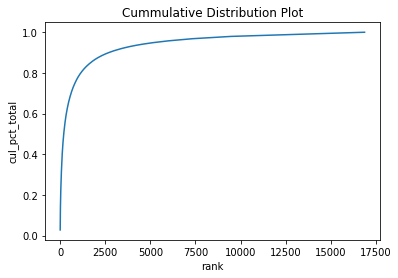

In [76]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc).set_title('Cummulative Distribution Plot');

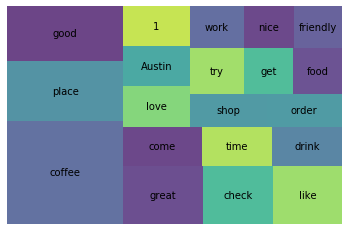

In [77]:
import squarify

# Overall lemma/token counts
wc_top20 = wc[wc['rank'] <= 20 ]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [79]:
# let's look at the word counts by coffee shop ratings
# a good coffee shop has a rating of 4 or 5
wc_good = count(shops[shops['rating'] >= 4]['lemmas'])

In [80]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
21,coffee,3916,8037,1.0,0.028443,0.028443,0.637785
126,place,3125,4797,2.0,0.016977,0.045420,0.508958
206,good,2948,4400,3.0,0.015572,0.060991,0.480130
104,great,2497,3459,4.0,0.012241,0.073233,0.406678
31,check,2686,2940,5.0,0.010405,0.083638,0.437459


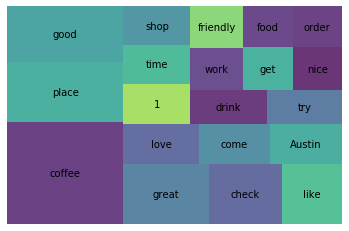

In [81]:
wc_top20_good = wc_good[wc_good['rank'] <= 20 ]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8)
plt.axis('off')
plt.show()
# According to our analysis, "good" coffee shops or shops given a 4-5 star rating can be described
# as "friendly" and "nice" with "great" "coffee," and "food".

In [87]:
# a bad coffee shop has a rating of less than 4
wc_bad = count(shops[shops['rating'] < 4 ]['lemmas'])

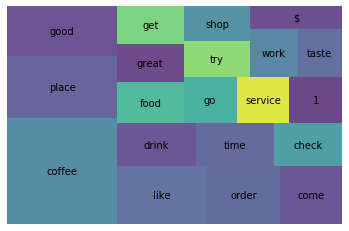

In [88]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8)
plt.axis('off')
plt.show()
# "Bad" coffee shop reviews, on the other hand, oftentimes referenced "service"
# and "order" in their review. They also used the money sign ($) to perhaps
# bring attention to the value of their purchase/experience.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [98]:
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
wc_diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct_bad']], how='inner')
wc_diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,coffee,0.637785,0.631436
1,place,0.508958,0.510840
2,good,0.480130,0.434959
3,great,0.406678,0.234417
4,check,0.437459,0.331301


In [101]:
wc_diff['diff'] = abs(wc_diff['appears_in_pct'] - wc_diff['appears_in_pct_bad'])

wc_diff.head()

,word,appears_in_pct,appears_in_pct_bad,diff
0,coffee,0.637785,0.631436,0.006349
1,place,0.508958,0.510840,0.001882
2,good,0.480130,0.434959,0.045171
3,great,0.406678,0.234417,0.172260
4,check,0.437459,0.331301,0.106158


In [108]:
wc_diff.sort_values(by='diff', ascending=False)[:10]

,word,appears_in_pct,appears_in_pct_bad,diff
3,great,0.406678,0.234417,0.172260
21,delicious,0.188274,0.057588,0.130686
5,like,0.273127,0.403794,0.130667
19,order,0.166287,0.292005,0.125719
6,love,0.258958,0.141599,0.117359
15,friendly,0.234365,0.127371,0.106994
4,check,0.437459,0.331301,0.106158
139,ask,0.050651,0.149051,0.098400
36,service,0.138274,0.234417,0.096144
209,bad,0.036645,0.128726,0.092081


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

